# Домашнее задание 9

Добро пожаловать на девятое домашнее задание, в нем Вам предстоит запустить алгоритм **DBSCAN** и посчитать метрику **silhouette**.

В этом наборе данных находиться информация о результатах ЕГЭ учеников школы города N

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("9_hw_dataset.csv", index_col = 0)

In [3]:
df

,ЕГЭ_Математика,ЕГЭ_Информатика
id,,
0,98,90
1,70,61
2,88,93
3,97,89
4,100,96
...,...,...
763,54,52
764,89,94
765,63,62


### Задание 1

Визулизируйте данные

Подумайте, на сколько кластеров можно разделить эти данные?

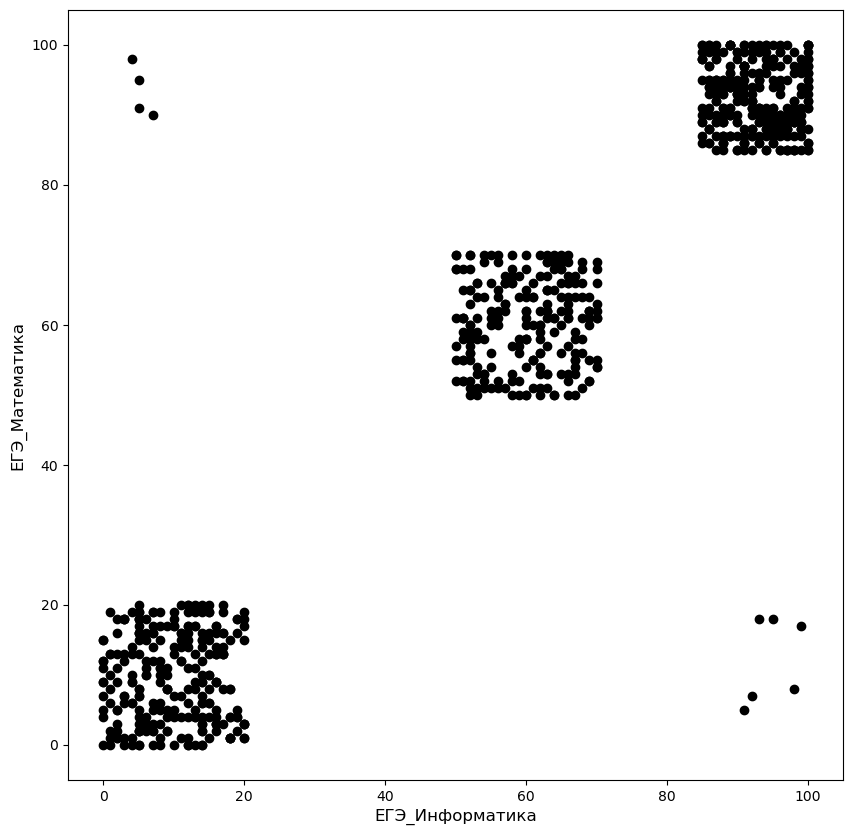

In [4]:
plt.figure(figsize=(10,10))
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df, color="black")
plt.ylabel("ЕГЭ_Математика", fontsize=12)
plt.xlabel("ЕГЭ_Информатика", fontsize=12)
plt.show()

### Задание 2

Реализуейте алгоритм **DBSCAN** с любой конфигурацией

In [5]:
from sklearn.cluster import DBSCAN

X = df

clustering = DBSCAN(eps=5,min_samples=5).fit(X)

In [6]:
df["Номер_кластера"] = clustering.labels_ # выполните предсказание получивщейся моделью DBSCAN

In [7]:
df["Номер_кластера"].unique()

array([ 0,  1,  2, -1], dtype=int64)

Визуализируйте результат работы алгоритма и оцените его.

Для того, чтобы визуализировать точки кластера под номером n нужно выбрать цвет точек, которым они будут отображаться на экране. Цвет точек можно выбрать по этой ссылке: https://matplotlib.org/stable/gallery/color/named_colors.html

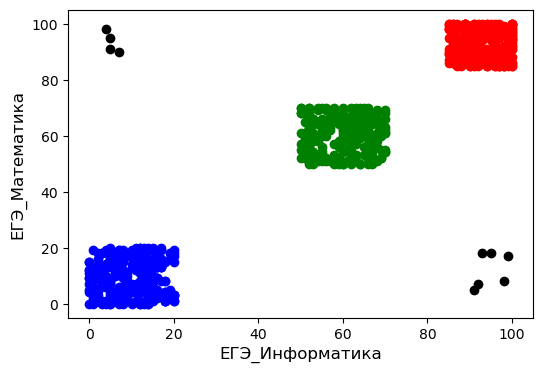

In [8]:
plt.figure(figsize=(6,4))
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера"]==-1], color='black')
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера"]==0], color='r')
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера"]==1], color='g')
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера"]==2], color='b')
plt.ylabel("ЕГЭ_Математика", fontsize=12)
plt.xlabel("ЕГЭ_Информатика", fontsize=12)
plt.show()

### Задание 3

Оцените результат алгоритма с помщью метрики **silhouette**

In [9]:
from sklearn.metrics import silhouette_score
silhouette_score(X,df["Номер_кластера"])

0.79872819913906

### Задание 4

Запустите еще 3 раза алгоритм **DBSCAN** с такими конфигурациями как:

* <code>eps=5, min_samples=5</code>
* <code>eps=1000, min_samples=1</code>
* <code>eps=0.001, min_samples=1000</code>

Для каждого алгоритма кластеризации визуализируйте результат и подсчитайте метрику **silhouette**

In [11]:
clustering = DBSCAN(eps=1000,min_samples=1).fit(X)
df["Номер_кластера1"] = clustering.labels_
print(df["Номер_кластера1"].unique())

[0]


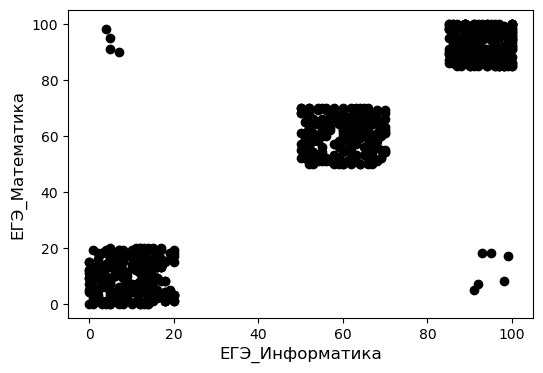

In [13]:
plt.figure(figsize=(6,4))
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера1"]==0], color='black')
plt.ylabel("ЕГЭ_Математика", fontsize=12)
plt.xlabel("ЕГЭ_Информатика", fontsize=12)
plt.show()

In [15]:
clustering = DBSCAN(eps=0.001,min_samples=1000).fit(X)
df["Номер_кластера2"] = clustering.labels_
print(df["Номер_кластера2"].unique())

[-1]


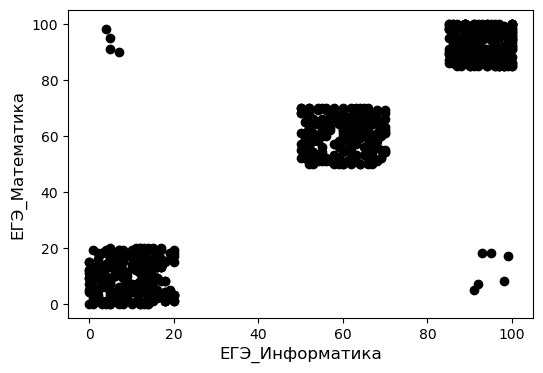

In [16]:
plt.figure(figsize=(6,4))
plt.scatter("ЕГЭ_Математика", "ЕГЭ_Информатика", data=df[df["Номер_кластера2"]==-1], color='black')
plt.ylabel("ЕГЭ_Математика", fontsize=12)
plt.xlabel("ЕГЭ_Информатика", fontsize=12)
plt.show()

Сохраните в переменную  <code>silhouette_best</code> метрику **silhouette** для наилучшего алгоритма из предыдущего шага

In [17]:
silhouette_best = silhouette_score(X,df["Номер_кластера"])

И так, поздравляем, Вы выполнили девятое домашнее задание!

Теперь осталось чуть-чуть...

На платформу Школково Вам нужно будет загрузить файл с метрикой **silhouette** для наилучшего алогритма

Чтобы сделать это, выполните ячейки ниже. Тем самым Вы сохраните таблицу в файл <code>9_hw_answer.csv</code>. Затем загрузите этот файл на платформу Школково.

In [19]:
df_rezults = pd.DataFrame([
                    [silhouette_best],
                    ],
                   columns=['silhouette_score'], index=["Лучший алгоритм"])

df_rezults.to_csv("9_hw_answer.csv")